In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.shape

(1470, 35)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


No     1233
Yes     237
Name: Attrition, dtype: int64


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     2

In [7]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()

In [9]:
for i in data.columns:
    if data[i].dtype=="object":
        data[i]=OE.fit_transform(data[i].values.reshape(-1,1))

In [10]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,7,...,4,80,1,6,3,3,2,2,2,2


In [11]:
data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
data['Attrition'].value_counts()

0.0    1233
1.0     237
Name: Attrition, dtype: int64

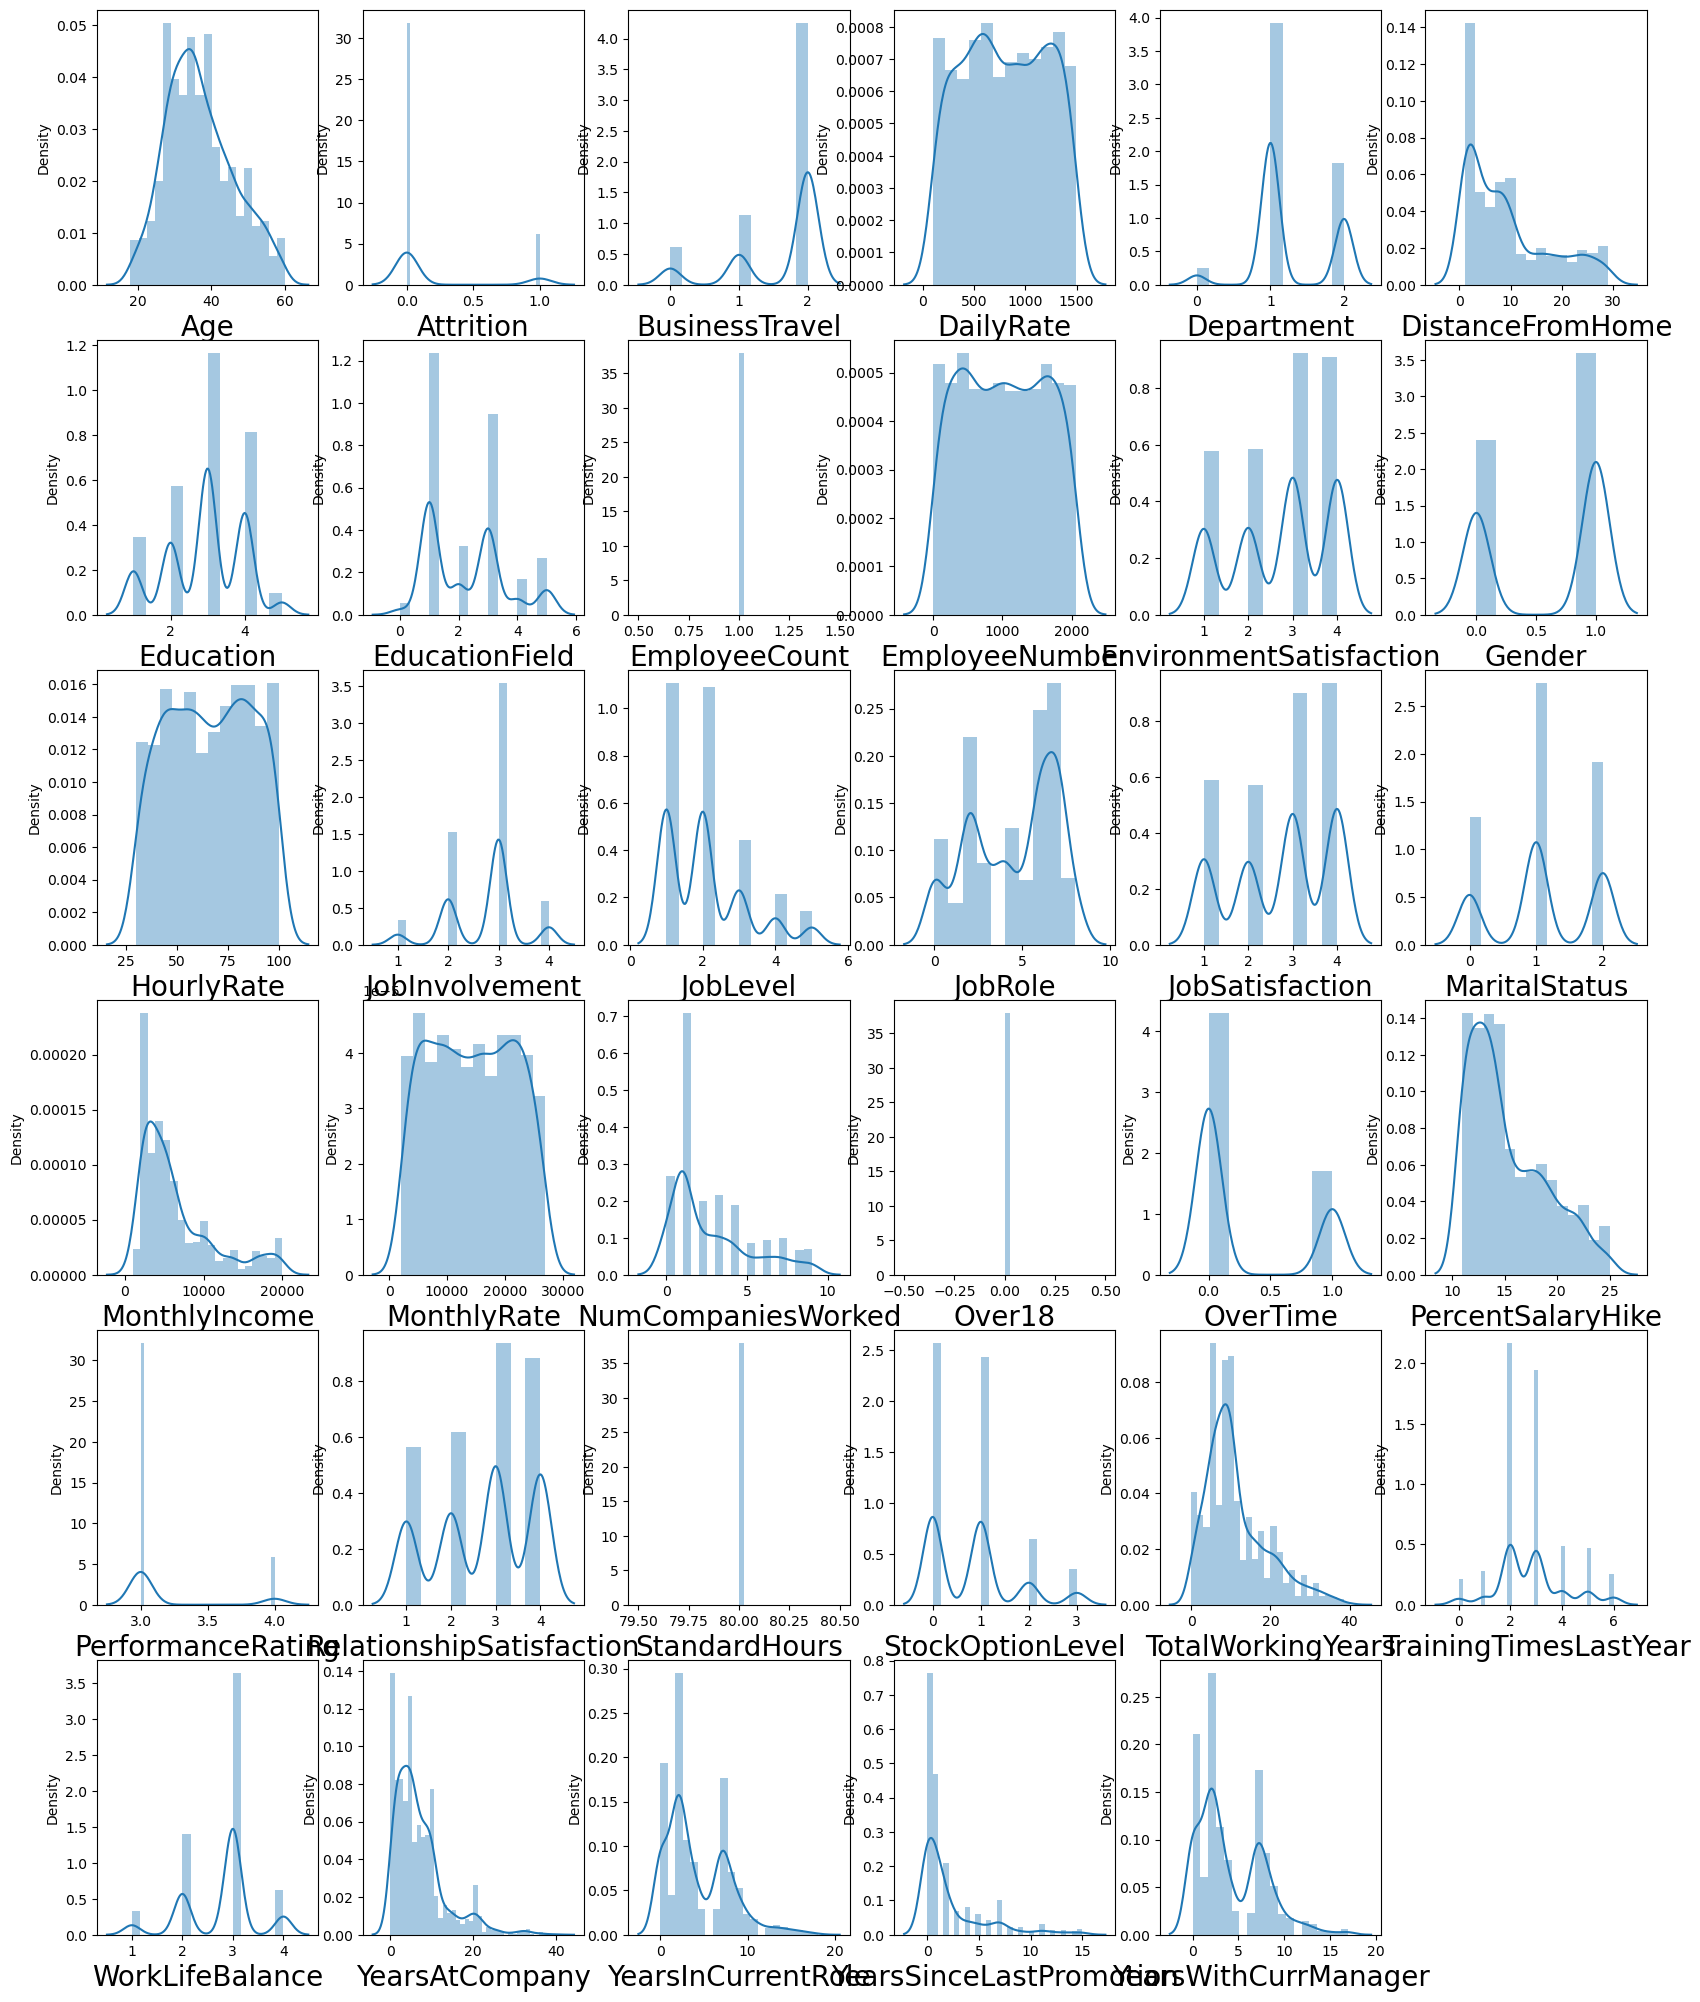

In [13]:
plt.figure(figsize=(20,25),facecolor='w')
plot=1
for i in data.columns:
    if plot<=35:
        ax=plt.subplot(6,6,plot)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    plot+=1
plt.show()

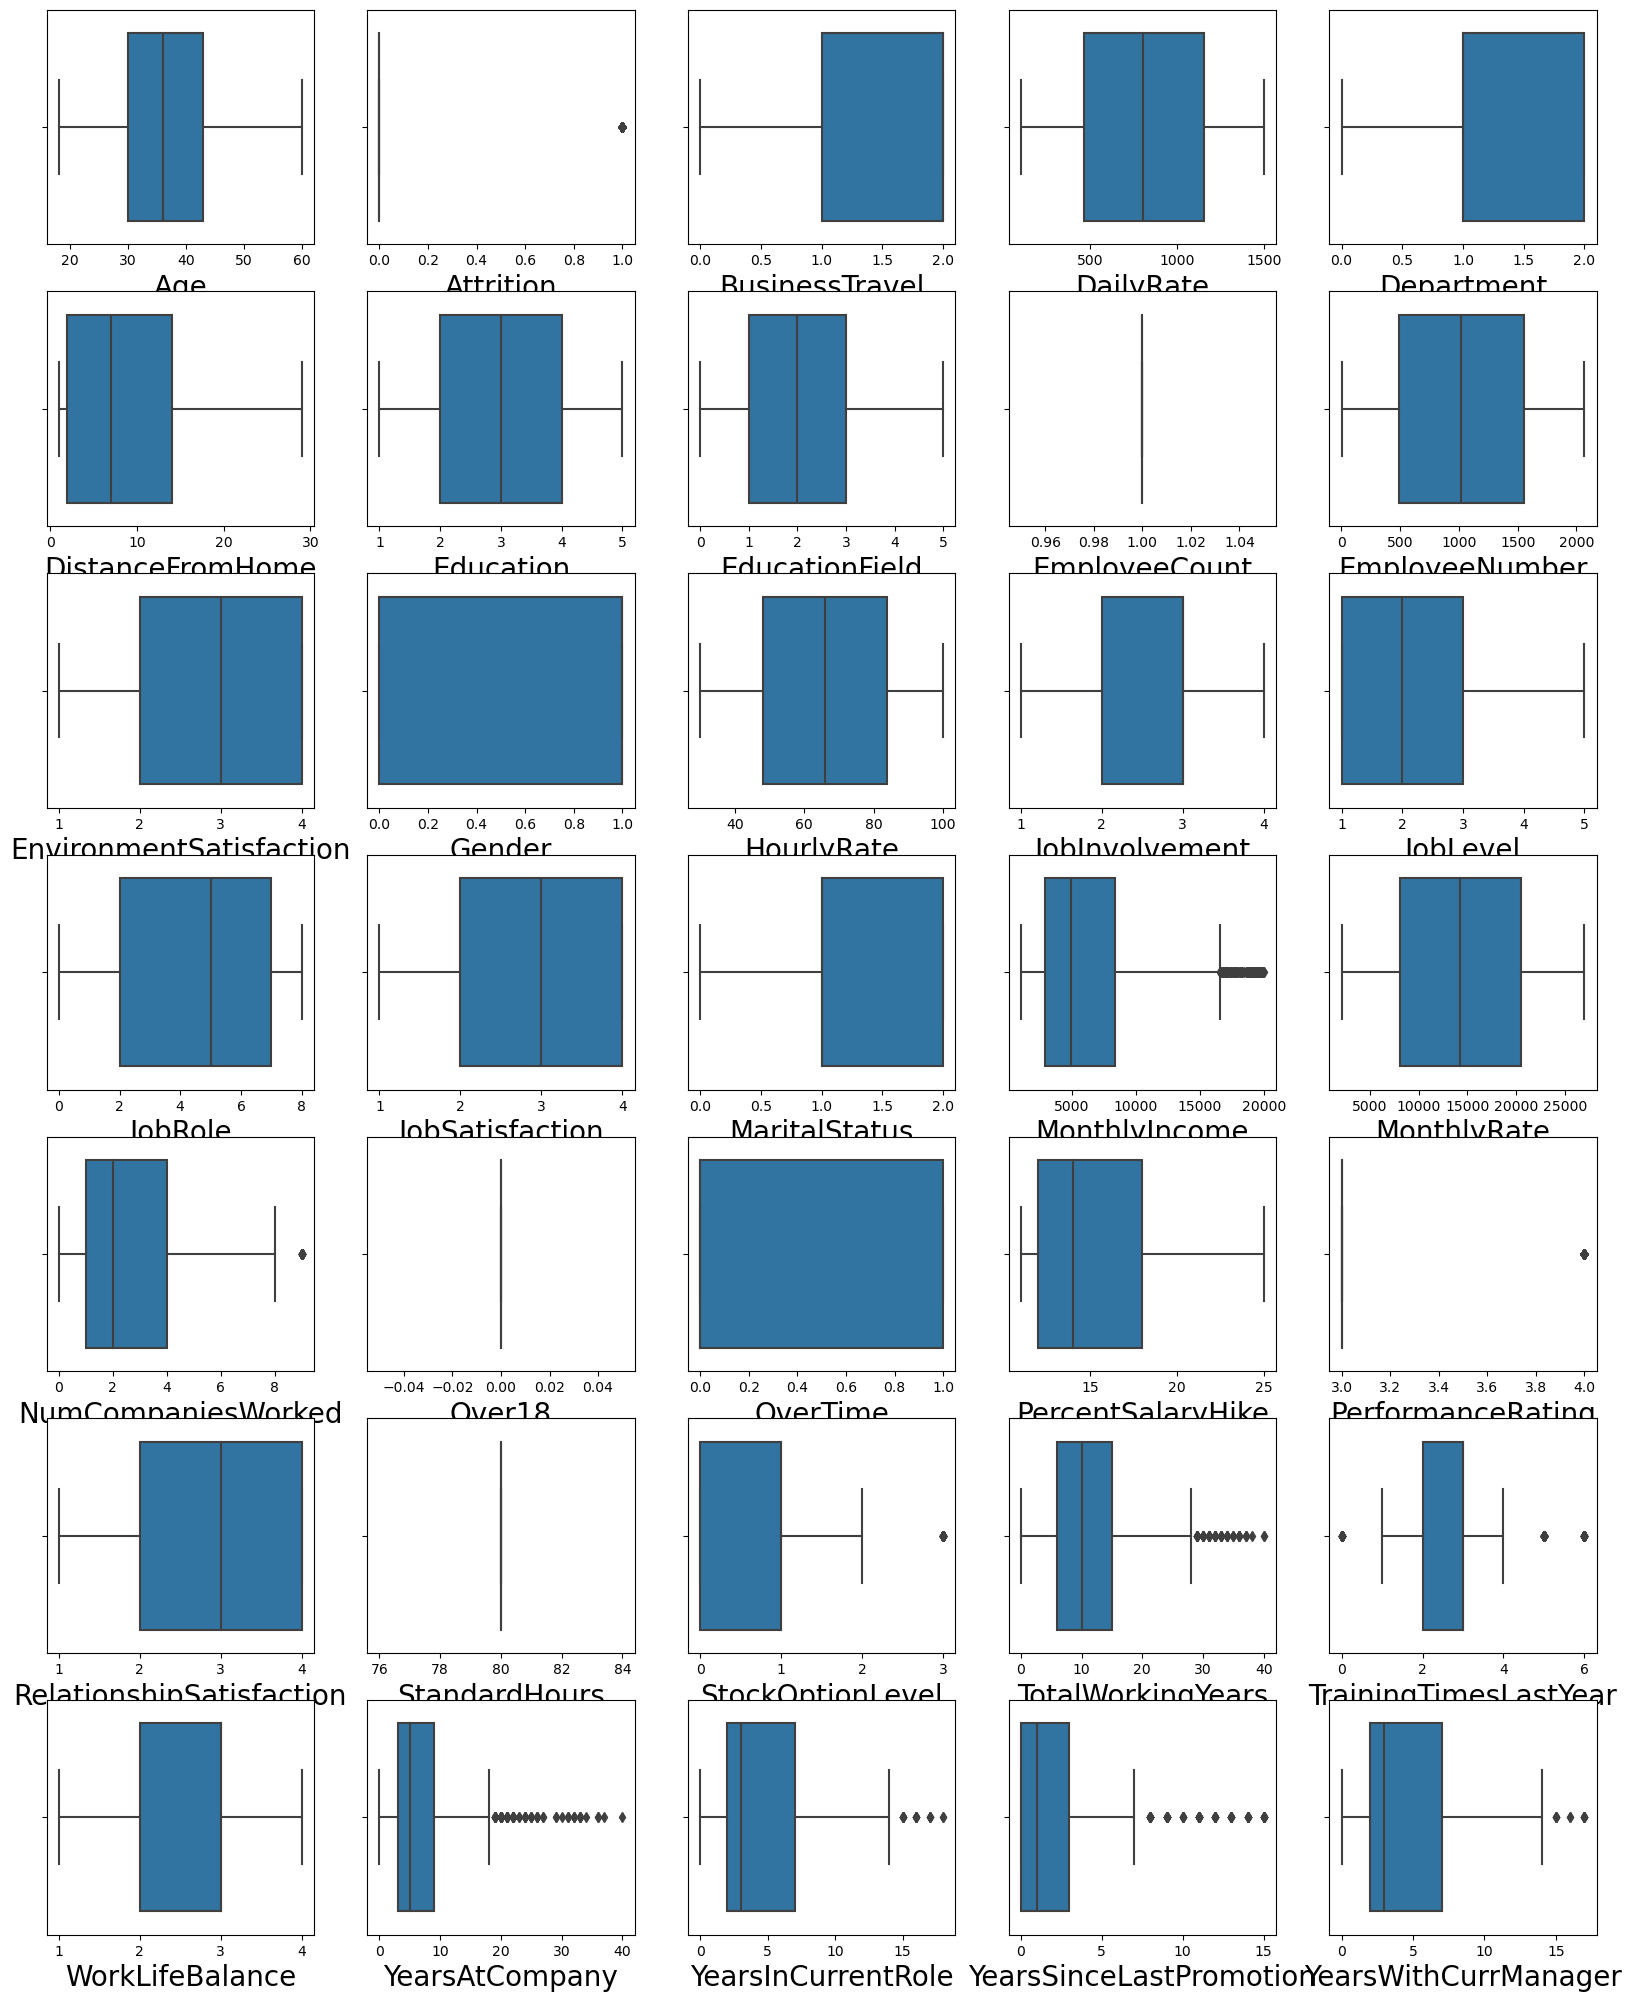

In [14]:
plt.figure(figsize=(20,25),facecolor='w')
plot=1
for i in data.columns:
    if plot<=35:
        ax=plt.subplot(7,5,plot)
        sns.boxplot(data[i])
        plt.xlabel(i,fontsize=20)
    plot+=1
plt.show()

In [15]:
q1=data.quantile(.25)
q3=data.quantile(.75)
iqr=q3-q1
iqr

Age                            13.00
Attrition                       0.00
BusinessTravel                  1.00
DailyRate                     692.00
Department                      1.00
DistanceFromHome               12.00
Education                       2.00
EducationField                  2.00
EmployeeCount                   0.00
EmployeeNumber               1064.50
EnvironmentSatisfaction         2.00
Gender                          1.00
HourlyRate                     35.75
JobInvolvement                  1.00
JobLevel                        2.00
JobRole                         5.00
JobSatisfaction                 2.00
MaritalStatus                   1.00
MonthlyIncome                5468.00
MonthlyRate                 12414.50
NumCompaniesWorked              3.00
Over18                          0.00
OverTime                        1.00
PercentSalaryHike               6.00
PerformanceRating               0.00
RelationshipSatisfaction        2.00
StandardHours                   0.00
S

In [16]:
mi_h=q3.MonthlyIncome+(1.5*iqr.MonthlyIncome)
ind_num=np.where(mi_h<data['MonthlyIncome'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(1356, 35)

In [17]:
nc_h=q3.NumCompaniesWorked+(1.5*iqr.NumCompaniesWorked)
ind_num=np.where(nc_h<data['NumCompaniesWorked'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(1309, 35)

In [18]:
tw_h=q3.TotalWorkingYears+(1.5*iqr.TotalWorkingYears)
ind_num=np.where(tw_h<data['TotalWorkingYears'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(1280, 35)

In [19]:
yc_h=q3.YearsAtCompany+(1.5*iqr.YearsAtCompany)
ind_num=np.where(yc_h<data['YearsAtCompany'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(1241, 35)

In [20]:
ycr_h=q3.YearsInCurrentRole+(1.5*iqr.YearsInCurrentRole)
ind_num=np.where(ycr_h<data['YearsInCurrentRole'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(1238, 35)

In [21]:
ye_h=q3.YearsSinceLastPromotion+(1.5*iqr.YearsSinceLastPromotion)
ind_num=np.where(ye_h<data['YearsSinceLastPromotion'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(1190, 35)

In [22]:
ym_h=q3.YearsWithCurrManager+(1.5*iqr.YearsWithCurrManager)
ind_num=np.where(ym_h<data['YearsWithCurrManager'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(1187, 35)

In [23]:
data.skew()

Age                         0.577696
Attrition                   1.726168
BusinessTravel             -1.431038
DailyRate                  -0.017615
Department                  0.164817
DistanceFromHome            0.934338
Education                  -0.267977
EducationField              0.539868
EmployeeCount               0.000000
EmployeeNumber             -0.000035
EnvironmentSatisfaction    -0.309871
Gender                     -0.455004
HourlyRate                 -0.054097
JobInvolvement             -0.503779
JobLevel                    0.720759
JobRole                    -0.433709
JobSatisfaction            -0.333324
MaritalStatus              -0.174875
MonthlyIncome               1.315835
MonthlyRate                 0.037483
NumCompaniesWorked          1.008189
Over18                      0.000000
OverTime                    0.973574
PercentSalaryHike           0.765279
PerformanceRating           1.882431
RelationshipSatisfaction   -0.286446
StandardHours               0.000000
S

In [24]:
from scipy.stats import skew

Age
0.576965522048165
Attrition
1.7239854200805114
BusinessTravel
-1.4292293964841492
DailyRate
-0.017592312204850143
Department
0.16460874064237835
DistanceFromHome
0.9331564625538609
Education
-0.2676386131371658
EducationField
0.5391851260375693
EmployeeCount
nan
EmployeeNumber
-3.509675844393685e-05
EnvironmentSatisfaction
-0.30947941884964947
Gender
-0.45442870571126326
HourlyRate
-0.0540284527986345
JobInvolvement
-0.5031419490287555
JobLevel
0.7198482787974037
JobRole
-0.43316051595920135
JobSatisfaction
-0.33290260274525507
MaritalStatus
-0.17465354710707318
MonthlyIncome
1.3141719767788886
MonthlyRate
0.03743582413779504
NumCompaniesWorked
1.0069149917884712
Over18
nan
OverTime
0.9723432616018176
PercentSalaryHike
0.7643111014970865
PerformanceRating
1.880051484105607
RelationshipSatisfaction
-0.28608387995628914
StandardHours
nan
StockOptionLevel
0.9403737792142806
TotalWorkingYears
0.7939158936772764
TrainingTimesLastYear
0.5726840063429179
WorkLifeBalance
-0.552019773250141

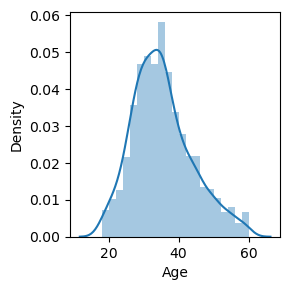

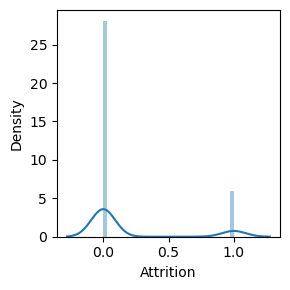

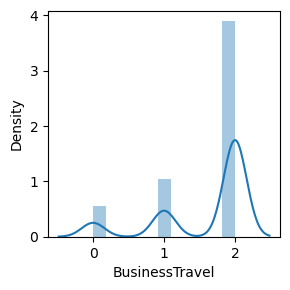

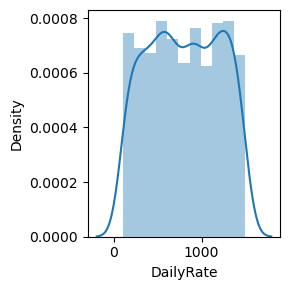

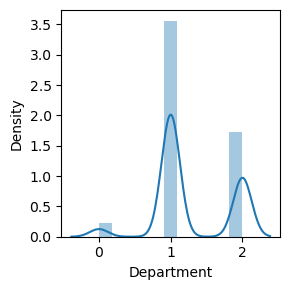

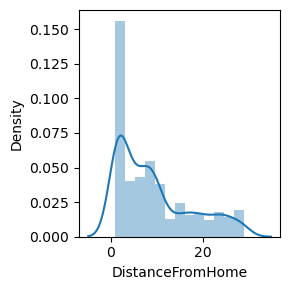

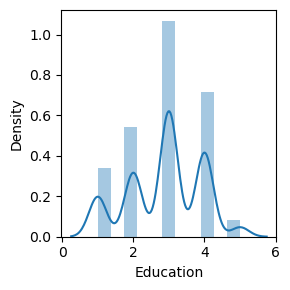

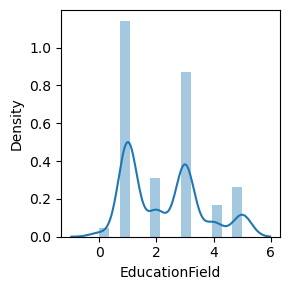

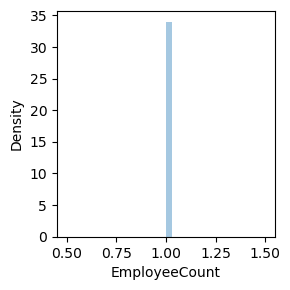

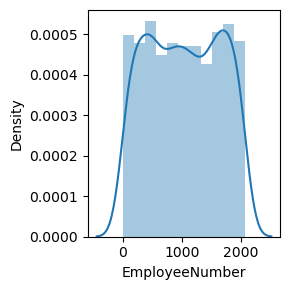

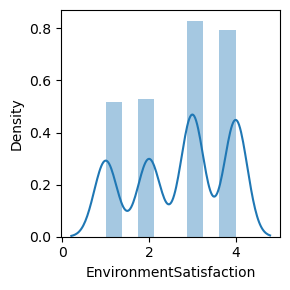

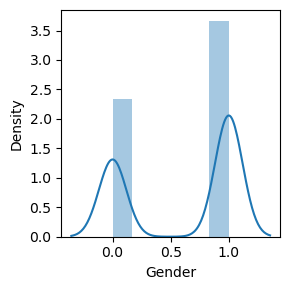

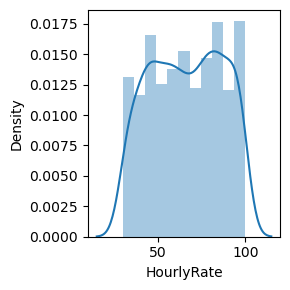

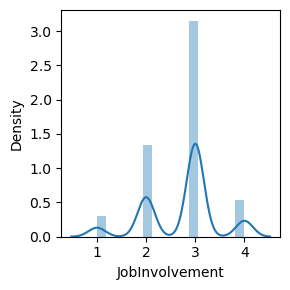

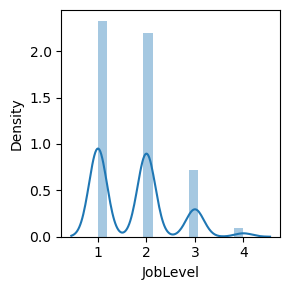

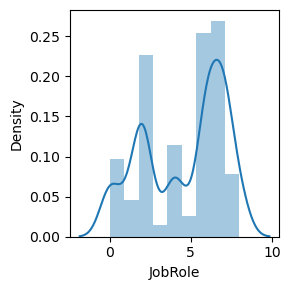

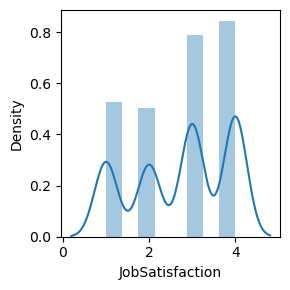

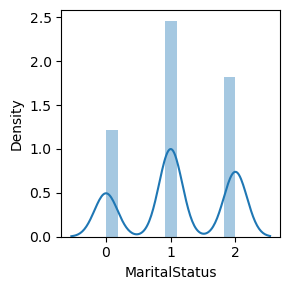

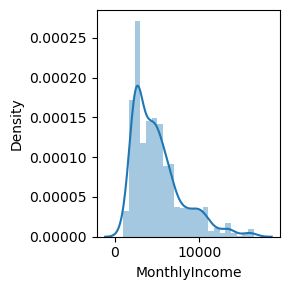

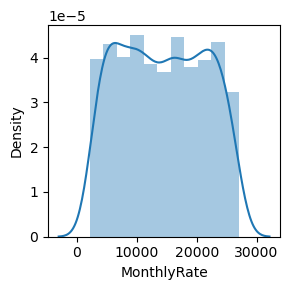

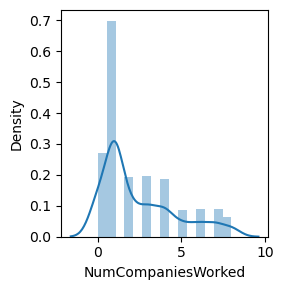

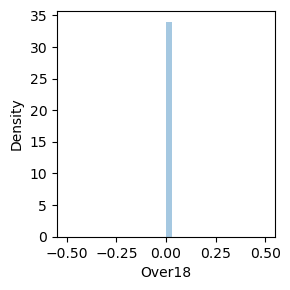

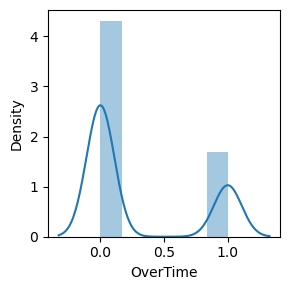

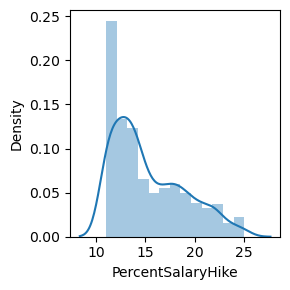

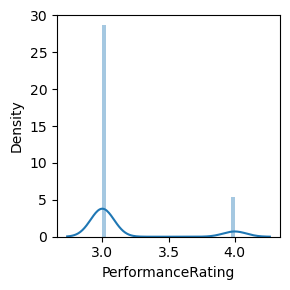

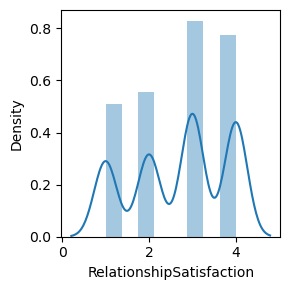

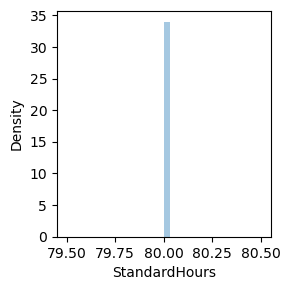

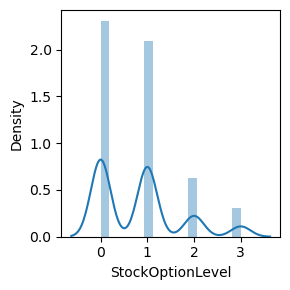

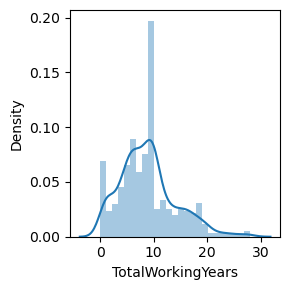

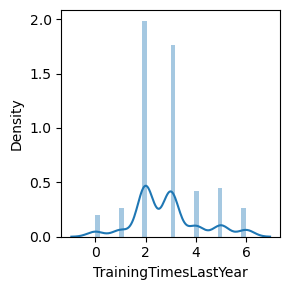

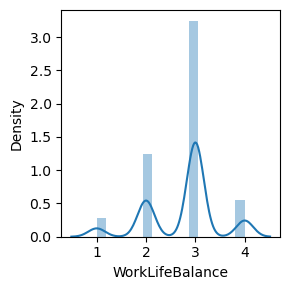

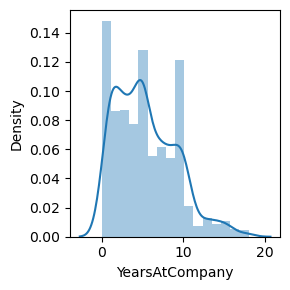

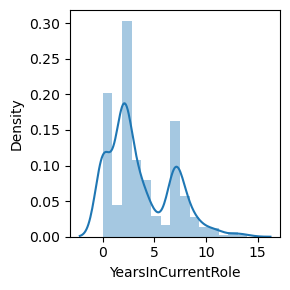

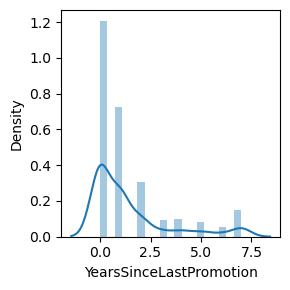

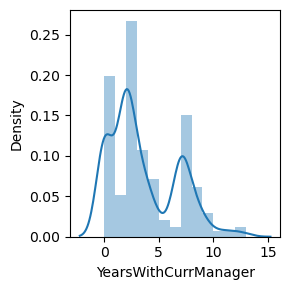

In [25]:
for i in data:
    print(i)
    print(skew(data[i]))
    
    plt.figure(figsize=(3,3))
    sns.distplot(data[i])
    plt.tight_layout()

In [26]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [27]:
x=data.drop(columns='Attrition',col)
y=data.Attrition

In [28]:
print(x.shape,'---------',y.shape)

(1187, 34) --------- (1187,)


In [39]:
scaled=pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
vif['feature']=scaled.columns

In [43]:
vif

,values,feature
0,1.641288,Age
1,1.019096,BusinessTravel
2,1.034413,DailyRate
3,2.398228,Department
4,1.029694,DistanceFromHome
5,1.085986,Education
6,1.026486,EducationField
7,NaN,EmployeeCount
8,1.035725,EmployeeNumber
9,1.032232,EnvironmentSatisfaction


In [44]:
scaled.drop(columns=['EmployeeCount','Over18','StandardHours','YearsAtCompany'],inplace=True)

In [45]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
vif['feature']=scaled.columns

In [46]:
vif

,values,feature
0,1.638228,Age
1,1.018327,BusinessTravel
2,1.034337,DailyRate
3,2.398075,Department
4,1.029349,DistanceFromHome
5,1.085571,Education
6,1.024909,EducationField
7,1.032124,EmployeeNumber
8,1.031407,EnvironmentSatisfaction
9,1.025000,Gender


In [47]:
scaled.drop(columns='JobLevel',inplace=True)

In [48]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
vif['feature']=scaled.columns

In [49]:
vif

,values,feature
0,1.636292,Age
1,1.016096,BusinessTravel
2,1.032828,DailyRate
3,2.239784,Department
4,1.024616,DistanceFromHome
5,1.085560,Education
6,1.024262,EducationField
7,1.032004,EmployeeNumber
8,1.028254,EnvironmentSatisfaction
9,1.023521,Gender


In [50]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(scaled,y,test_size=.25,random_state=8)

In [59]:
print(x_train.shape,'------',x_test.shape,'------',y_train.shape,'------',y_test.shape)

(890, 29) ------ (297, 29) ------ (890,) ------ (297,)


In [60]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [61]:
log.fit(x_train,y_train)

LogisticRegression()

In [62]:
log.score(x_train,y_train)

0.8629213483146068

In [63]:
log.score(x_test,y_test)

0.8821548821548821

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
y_pred=log.predict(x_test)

In [67]:
accuracy_score(y_pred,y_test)

0.8821548821548821

In [70]:
print('predicted_result',y_pred,'\n','actual_result',np.array(y_test))

predicted_result [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0.] 
 actual_result [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0

In [71]:
import joblib

In [72]:
joblib.dump(log,'Attrition.pkl')

['Attrition.pkl']

In [73]:
model=joblib.load('Attrition.pkl')
prediction=model.predict(x_test)
prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.

In [74]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a

In [75]:
df

,predicted,original
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
292,0.0,0.0
293,0.0,0.0
294,0.0,0.0
295,0.0,0.0


In [77]:
accuracy_score(df['predicted'],df['original'])

0.8821548821548821